In [3]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw
from tqdm import tqdm

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [4]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99

  0%|          | 0/100 [00:00<?, ?it/s]

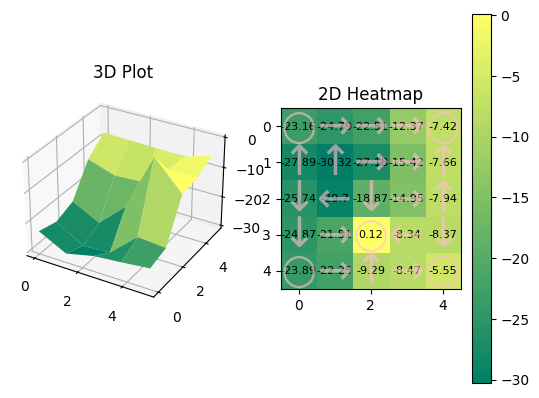

 20%|██        | 20/100 [00:00<00:02, 36.52it/s]

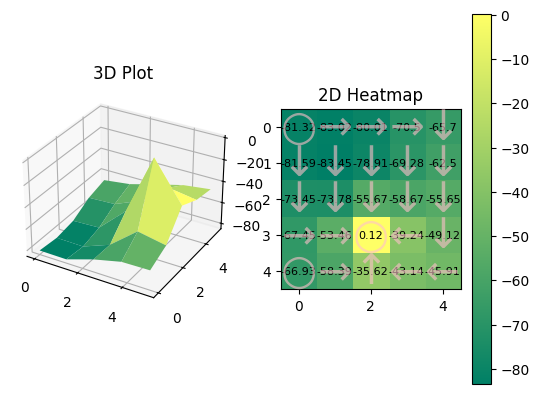

 39%|███▉      | 39/100 [00:01<00:01, 36.45it/s]

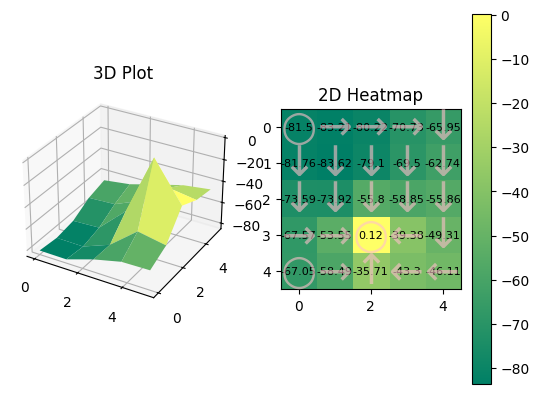

 58%|█████▊    | 58/100 [00:01<00:01, 35.31it/s]

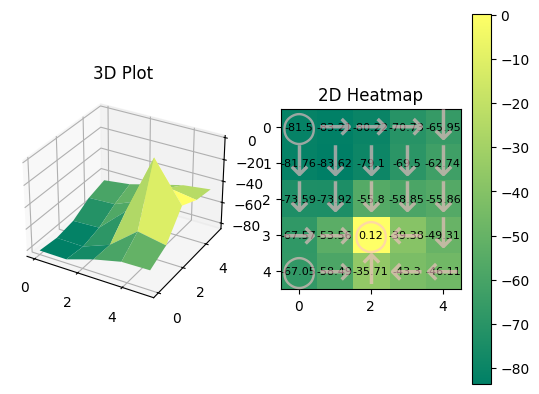

 77%|███████▋  | 77/100 [00:02<00:00, 34.88it/s]

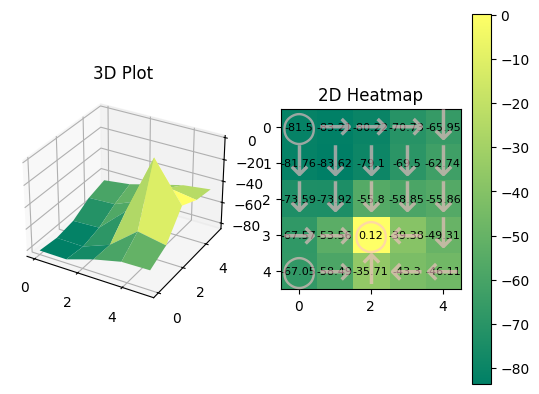

100%|██████████| 100/100 [00:03<00:00, 31.10it/s]


In [5]:
for _ in tqdm(range(100)):
    for i in range(len(episodes)):
        for j in range(len(episodes[i]) - 1, -1, -1):
            trajectory = episodes[i][j]
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
            next_state_value = state_values[nextState]
            target = tmpscore + (1.0 - terminal) * gamma * next_state_value

            TD_error = state_values[tmpstate] - target
            # print(TD_error)

            state_values[tmpstate] -= learning_rate * TD_error

    if _ % 20 == 0:
        action_values = np.random.rand(25, 5)
        for i in range(25):
            for j in range(5):
                score, nextState = env.get_reward(i, j)
                action_values[i][j] = score + gamma * state_values[nextState]

        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)
